# **Connect to Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/My\ Drive/Colab\ Notebooks/

/content/gdrive/My Drive/Colab Notebooks


# **Preprocessing the dataset**

- Load the data from Google Drive.
- Standardization (z-score).

In [23]:
import numpy as np
import pandas as pd
import h5py
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [4]:
def preprocessing_dataset(num_file, filename_prefix):
    X = []
    y = []

    # Load the data from h5py
    for i in range(1, num_file):
        
        filename = filename_prefix + str(i) + '.hdf5'
        print('Loading batch ' + str(i) + ' ...')

        with h5py.File(filename, 'r') as f:
            for j in f['X'][:]:
                X.append(j)

            for j in f['y'][:]:
                y.append(j)

    # Convert to numpy array
    X = np.array(X)
    y = np.array(y)

    # Calculate the mean of each channel
    mean_0 = X[:, 0, :, :].mean()
    mean_1 = X[:, 1, :, :].mean()
    mean_2 = X[:, 2, :, :].mean()

    # Calculate the standard deviation of each channel
    std_0 = X[:, 0, :, :].std()
    std_1 = X[:, 1, :, :].std()
    std_2 = X[:, 2, :, :].std()

    # Standardization
    X[:, 0, :, :] = (X[:, 0, :, :] - mean_0) / std_0
    X[:, 1, :, :] = (X[:, 1, :, :] - mean_1) / std_1
    X[:, 2, :, :] = (X[:, 2, :, :] - mean_2) / std_2

    return X, y

**Configure the dataset**

In [5]:
train_num_file = 11
train_filename_prefix = 'train_data/X_train_'

**Load the training set**

In [6]:
X_train, y_train = preprocessing_dataset(train_num_file, train_filename_prefix)

Loading batch 1 ...
Loading batch 2 ...
Loading batch 3 ...
Loading batch 4 ...
Loading batch 5 ...
Loading batch 6 ...
Loading batch 7 ...
Loading batch 8 ...
Loading batch 9 ...
Loading batch 10 ...


In [7]:
print(X_train.shape)
print(y_train.shape)

(192655, 3, 50, 50)
(192655,)


**Change the dimension N-C-H-W to N-H-W-C**

In [8]:
X_train = np.moveaxis(X_train, 1, -1)

In [9]:
print(X_train.shape)

(192655, 50, 50, 3)


# **Principal Component Analysis**

**Flatten the images**

In [10]:
X_train = X_train.reshape(-1, 7500)

**Create a DataFrame that will hold the pixel values of the images along with their respective labels**

In [11]:
feat_cols = ['pixel'+str(i) for i in range(X_train.shape[1])]

In [12]:
df = pd.DataFrame(X_train,columns=feat_cols)

In [13]:
df['label'] = y_train
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (192655, 7501)


In [14]:
df.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel7461,pixel7462,pixel7463,pixel7464,pixel7465,pixel7466,pixel7467,pixel7468,pixel7469,pixel7470,pixel7471,pixel7472,pixel7473,pixel7474,pixel7475,pixel7476,pixel7477,pixel7478,pixel7479,pixel7480,pixel7481,pixel7482,pixel7483,pixel7484,pixel7485,pixel7486,pixel7487,pixel7488,pixel7489,pixel7490,pixel7491,pixel7492,pixel7493,pixel7494,pixel7495,pixel7496,pixel7497,pixel7498,pixel7499,label
0,-0.592895,-0.697739,0.182532,-0.722106,-0.865438,0.071912,-0.851316,-0.939971,0.016602,-0.696264,-0.772272,0.154877,-0.489527,-0.697739,0.182532,-0.567053,-0.660472,0.210187,0.285734,0.401624,0.486738,1.138522,1.258754,0.846253,-0.567053,-0.380973,-0.564155,-1.419841,-1.238103,-0.536500,-1.161420,-1.163570,-0.094019,-0.851316,-0.977238,-0.011054,-0.773790,-0.865438,0.099567,-0.747948,...,-0.386159,-0.343707,0.348462,-0.205265,-0.250540,0.459082,-0.567053,-0.548672,0.403772,-0.567053,-0.418240,0.707978,-0.696264,-0.772272,0.459082,-0.644580,-0.641839,0.542048,-0.696264,-0.697739,0.486738,-0.696264,-0.679105,0.569703,-0.592895,-0.623205,0.597358,-0.463685,-0.436873,0.597358,-0.360317,-0.399606,0.652668,-0.463685,-0.492773,0.625013,-0.670422,-0.660472,0.625013,0
1,0.725049,0.699756,0.846253,0.569997,0.476157,0.763288,0.259892,0.382990,0.652668,0.776733,0.681123,0.818598,0.621681,0.625223,0.790943,0.414945,0.438890,0.707978,0.363260,0.420257,0.625013,0.647523,0.625223,0.652668,0.544155,0.476157,0.790943,0.569997,0.681123,0.763288,0.699207,0.625223,0.735633,0.725049,0.737022,0.818598,0.673365,0.662489,0.735633,0.311576,...,0.208208,0.271191,0.625013,0.389102,0.364357,0.514393,0.440787,0.494790,0.680323,0.776733,0.718389,0.790943,0.414945,0.420257,0.707978,0.285734,0.233924,0.431427,0.104840,0.103492,0.403772,0.285734,0.233924,0.486738,0.078998,0.122125,0.625013,0.053156,-0.026941,0.597358,0.156524,0.178025,0.625013,0.363260,0.289824,0.680323,0.311576,0.271191,0.680323,0
2,-0.747948,-0.828171,-0.868360,-0.747948,-0.828171,-0.785395,-0.360317,-0.455506,0.127222,-0.489527,-0.548672,-0.149329,-0.773790,-0.865438,-0.757740,-1.652420,-1.629402,-2.444699,-1.109736,-1.107670,-1.449117,-0.696264,-0.790905,-1.061946,-0.851316,-0.865438,-1.338496,-0.980526,-0.958604,-0.896015,-0.489527,-0.585939,-0.425879,-1.884998,-1.536235,-0.259949,-2.014208,-1.685301,-0.674775,-1.238947,...,1.112680,1.240120,0.763288,0.130682,-0.026941,-0.204639,-1.549051,-1.554869,-2.112838,-0.928842,-1.089037,-1.366151,-0.722106,-0.828171,-0.730085,-0.980526,-1.014504,-0.232294,-0.256949,-0.325073,-0.149329,-0.954684,-1.089037,-1.504427,-1.471525,-1.666668,-2.334079,-1.549051,-1.536235,-2.417044,-1.109736,-1.294003,-1.698012,-0.773790,-0.772272,-1.061946,0.466629,0.401624,0.154877,0
3,-0.386159,-0.530039,-0.232294,-1.135579,-1.144937,-1.283186,-0.386159,-0.436873,-0.094019,-1.083894,-0.977238,-0.121674,-0.463685,-0.511406,0.071912,-0.386159,-0.623205,-0.674775,0.466629,0.382990,0.127222,-0.567053,-0.641839,-1.089601,0.234050,0.196658,-0.619465,-0.618737,-0.567306,-1.449117,-1.316473,-1.294003,-2.002218,0.182366,0.196658,-0.149329,-0.722106,-0.735005,-1.504427,0.802575,...,-0.722106,-0.735005,0.044257,-0.592895,-0.660472,-0.204639,-0.489527,-0.511406,0.099567,-0.489527,-0.548672,0.071912,-0.231107,-0.287807,-0.011054,-0.076054,-0.157374,-0.121674,-0.386159,-0.567306,-0.591810,-0.334475,-0.530039,-0.342914,0.027314,-0.194641,0.099567,-0.489527,-0.641839,-0.757740,-0.463685,-0.492773,-0.370569,0.027314,-0.082841,0.099567,0.053156,-0.045574,0.071912,1
4,1.164364,1.146954,0.818598,0.802575,0.774289,0.652668,0.750891,0.699756,0.320807,-0.076054,-0.138741,-0.674775,1.035154,1.053788,0.625013,1.293574,1.370553,1.039839,1.190206,1.091054,0.735633,1.422784,1.426453,0.956873,1.2418

**Create the PCA method**

In [40]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df.iloc[:,:-1])

In [41]:
principal_Df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principal_Df['y'] = y_train

In [42]:
principal_Df.head(10)

,principal component 1,principal component 2,y
0,5.252695,-1.146914,0
1,-40.735275,0.700082,0
2,74.307602,17.198370,0
3,57.213367,0.505249,1
4,-67.188080,-27.507904,0
5,-73.679222,0.856774,0
6,36.976227,-14.007755,0
7,92.902176,2.997157,0
8,-34.239311,-10.115371,0
9,-72.636070,-6.376951,0


**Visualize the data in a two-dimensional space**

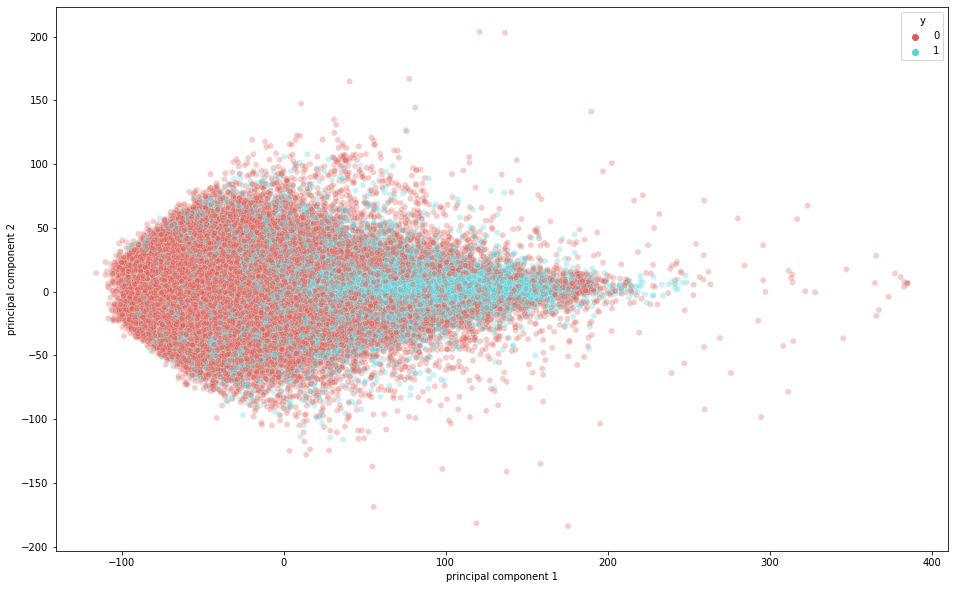

In [43]:
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=principal_Df,
    legend="full",
    alpha=0.3
)